In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Replace 'path_to_your_file.csv' with your file's path in Google Drive
df = pd.read_csv('/content/kpi project.csv')
df.head()  # Display the first few rows


,TransactionID,DateOfSale,CustomerID,Region,Product,Category,SalesAmount,QuantitySold,Discount,CostOfGoodsSold
0,0000fbd1,2023-06-02,2b0431,NORTH,product e,Sports,189.48,1,5,41.25
1,000e318f,2023-11-29,c3443f,EAST,product e,Toys,302.07,4,15,122.99
2,00139b35,2023-08-10,957d0c,WEST,unknown,Home Goods,247.79,4,10,138.96
3,001594a8,2023-12-28,de80ce,SOUTH,product a,Apparel,61.65,4,0,145.55
4,0015ba52,2023-07-12,6ea936,NORTH,product d,Electronics,149.85,1,0,60.90


In [3]:
total_revenue = df['SalesAmount'].sum()
print(f"Total Revenue: ${total_revenue:,.2f}")


Total Revenue: $264,678.92


In [4]:
# Group by month
df['DateOfSale'] = pd.to_datetime(df['DateOfSale'])  # Ensure datetime format
monthly_revenue = df.groupby(df['DateOfSale'].dt.to_period('M'))['SalesAmount'].sum()

# Calculate growth rate
monthly_revenue = monthly_revenue.to_frame(name='MonthlyRevenue')
monthly_revenue['GrowthRate'] = monthly_revenue['MonthlyRevenue'].pct_change() * 100

print(monthly_revenue)


            MonthlyRevenue  GrowthRate
DateOfSale                            
2023-01           21756.10         NaN
2023-02           16772.83  -22.905162
2023-03           24423.63   45.614246
2023-04           21225.40  -13.094818
2023-05           31074.92   46.404402
2023-06           19001.42  -38.852876
2023-07           17107.55   -9.966992
2023-08           23848.53   39.403538
2023-09           20891.15  -12.400680
2023-10           25231.02   20.773725
2023-11           19661.72  -22.073226
2023-12           23684.65   20.460723


In [5]:
average_order_value = df['SalesAmount'].sum() / df['TransactionID'].nunique()
print(f"Average Order Value: ${average_order_value:,.2f}")


Average Order Value: $264.68


In [6]:
revenue_by_region_product = df.groupby(['Region', 'Product'])['SalesAmount'].sum().reset_index()
print(revenue_by_region_product)


     Region    Product  SalesAmount
0      EAST  product a     11807.37
1      EAST  product b     12006.67
2      EAST  product c     19893.72
3      EAST  product d      7687.35
4      EAST  product e     14294.71
5      EAST    unknown      2356.27
6     NORTH  product a     11284.15
7     NORTH  product b     10380.29
8     NORTH  product c      9281.53
9     NORTH  product d      6972.38
10    NORTH  product e     11472.16
11    NORTH    unknown      5147.21
12    SOUTH  product a     16051.62
13    SOUTH  product b     13369.88
14    SOUTH  product c     13475.16
15    SOUTH  product d     15582.67
16    SOUTH  product e     11515.96
17    SOUTH    unknown      1864.34
18  UNKNOWN  product a      1225.93
19  UNKNOWN  product b      2571.79
20  UNKNOWN  product c      1584.21
21  UNKNOWN  product d      2475.81
22  UNKNOWN  product e      1732.64
23  UNKNOWN    unknown       483.43
24     WEST  product a     11247.73
25     WEST  product b     12125.75
26     WEST  product c     1

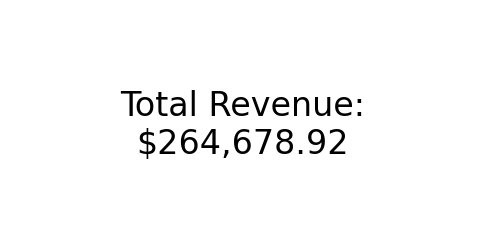

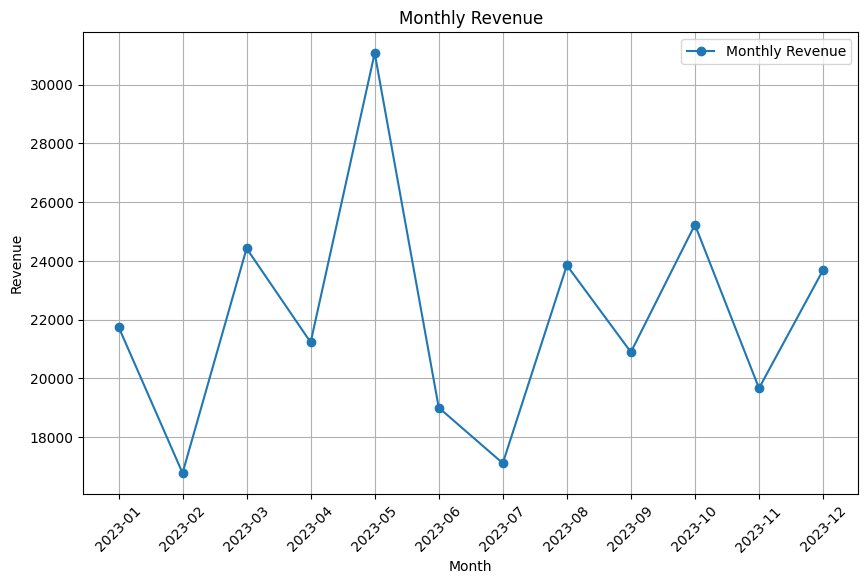

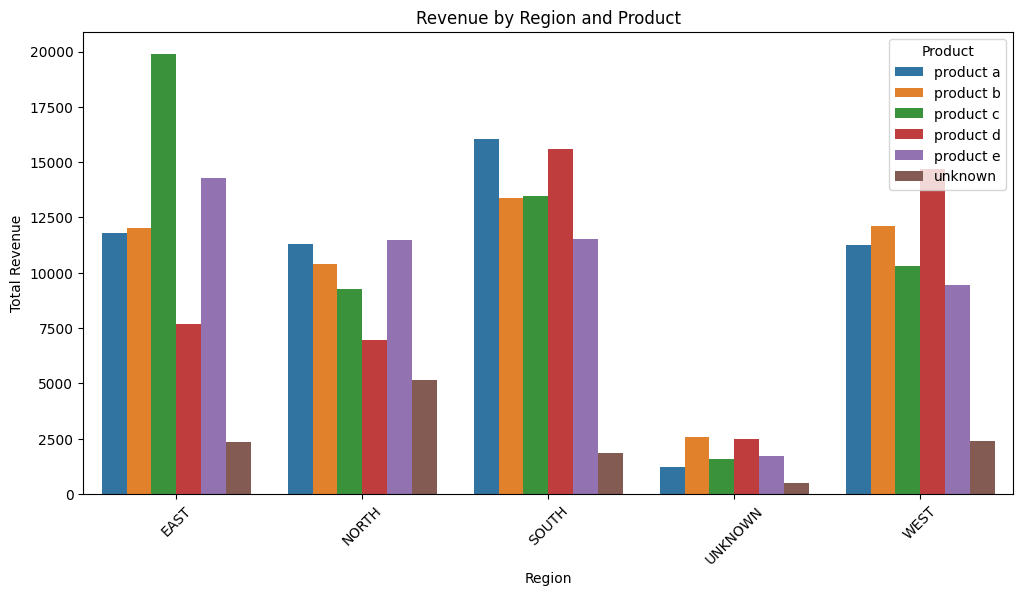

In [9]:
plt.figure(figsize=(6, 3))
plt.text(0.5, 0.5, f"Total Revenue:\n${total_revenue:,.2f}", fontsize=24, ha='center', va='center')
plt.axis('off')
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(monthly_revenue.index.astype(str), monthly_revenue['MonthlyRevenue'], marker='o', label='Monthly Revenue')
plt.title('Monthly Revenue')
plt.ylabel('Revenue')
plt.xlabel('Month')
plt.xticks(rotation=45)
plt.grid()
plt.legend()
plt.show()

plt.figure(figsize=(12, 6))
sns.barplot(data=revenue_by_region_product, x='Region', y='SalesAmount', hue='Product')
plt.title('Revenue by Region and Product')
plt.ylabel('Total Revenue')
plt.xlabel('Region')
plt.xticks(rotation=45)
plt.show()


